In [ ]:
# Implement a multi layered perceptron to classify the data using keras

In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Convert the data to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data
x_train /= 255
x_test /= 255

# Convert the labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Save the model
model.save('mnist.h5')

11490434/11490434 [==============================] - 14s 1us/step
Epoch 1/100


2022-11-02 10:21:18.384385: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 2s 4ms/step - loss: 1.0749 - accuracy: 0.7653 - val_loss: 0.5130 - val_accuracy: 0.8764
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.4413 - accuracy: 0.8850 - val_loss: 0.3640 - val_accuracy: 0.9019
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3545 - accuracy: 0.9015 - val_loss: 0.3161 - val_accuracy: 0.9132
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3149 - accuracy: 0.9118 - val_loss: 0.2880 - val_accuracy: 0.9206
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2893 - accuracy: 0.9180 - val_loss: 0.2668 - val_accuracy: 0.9254
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2695 - accuracy: 0.9242 - val_loss: 0.2525 - val_accuracy: 0.9299
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2536 - accuracy: 0.9285 - val_loss: 0.2397 - val_accuracy: 0.9331
Epoch 8/100

In [4]:
# Load the model
model = keras.models.load_model('mnist.h5')

# Predict the model
predictions = model.predict(x_test)

# Print the predictions
print(predictions)

# Print the actual values
#print(y_test)

313/313 [==============================] - 0s 1ms/step
[[2.9648038e-06 2.0170182e-07 1.5997488e-04 ... 9.9955755e-01
  4.1216549e-06 2.1502423e-05]
 [8.9865119e-07 7.8650948e-05 9.9980742e-01 ... 1.6591443e-11
  3.0399864e-05 1.0785838e-12]
 [4.9819660e-06 9.9740869e-01 3.9974018e-04 ... 8.3444093e-04
  1.0174761e-03 1.5152138e-05]
 ...
 [2.8165478e-10 5.0026761e-10 1.4301099e-09 ... 4.1007506e-06
  1.3526060e-05 1.8273289e-05]
 [2.2066304e-07 5.2723237e-08 1.0843381e-09 ... 8.4310443e-09
  2.0354730e-04 5.8211636e-09]
 [5.2496461e-07 6.5084299e-10 1.3198181e-07 ... 6.4889621e-12
  5.4116428e-10 1.0986333e-09]]


[[ 968    0    1    1    1    3    2    1    2    1]
 [   0 1125    2    1    0    1    2    1    3    0]
 [   3    3 1012    2    2    0    1    5    4    0]
 [   0    0    3  989    0    3    1    5    6    3]
 [   1    0    6    0  962    0    2    2    0    9]
 [   3    0    0    8    2  868    5    0    5    1]
 [   5    3    2    1    2    3  938    1    3    0]
 [   1    4    7    3    0    0    0 1007    2    4]
 [   3    0    3    3    3    2    3    2  952    3]
 [   2    4    1    5   11    2    1    5    4  974]]


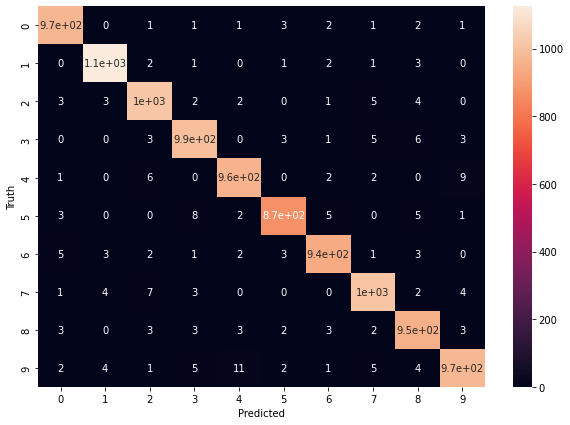

In [5]:
#confusuion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print the confusion matrix
print(cm)